In [160]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [161]:
def draw_points(points, x=None, y=None):
    plt.plot(*np.transpose(points), 'o')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axvline(x=0, color='r', linestyle='-')
    plt.axhline(y=0, color='r', linestyle='-')
    if x is not None and y is not None:
        plt.axvline(x=x, color='r', linestyle='-')
        plt.axhline(y=y, color='r', linestyle='-')
    plt.show()

In [162]:
def _gen_correlated_uniform_data(n: int, sx: float, sy: float, corr_coef: float) -> list:
    
    # magick function (based on Lagrange interpolation)
    # adjust correlation coefficient
# #     f = lambda x: (843.491*x**9-3747.36*x**8+6991.44*x**7
# #                     -7112.28*x**6+4290.12*x**5-1566.84*x**4
# #                     +342.07*x**3-43.6857*x**2+4.04011*x)
# # #     if corr_coef > 0.2:
    f = lambda x: (2093.85*x**9-9417.48*x**8+17774*x**7
                   -18291*x**6+11172.7*x**5-4138.6*x**4
                   +913.458*x**3-113.754*x**2+7.73475*x+0.0583161)
    corr_coef = f(corr_coef)
    t = 1 - corr_coef

    # generate points from areas (0,1)x(0,1), (0,t)x(0,1) and (1-t,1)x(0,1)
    points_x = np.hstack([np.random.uniform(size=n),
                            np.random.uniform(low=0, high=t, size=round(t*n)),
                            np.random.uniform(low=1-t, high=1, size=round(t*n))])
    
    points_y = np.random.uniform(size=n+2*round(t*n))
#     np.random.shuffle(points_x)
    points = np.array([points_x, points_y])

    # scale by (sqrt(2), t*sqrt(2))
    scale_matrix = np.array([[np.sqrt(2), 0],
                             [0, t*np.sqrt(2)]])
    points = np.dot(scale_matrix, points)
    
    # translate by vector (0, -t*sqrt(2)/2)
    points = points - np.array([[0], [t*np.sqrt(2)/2]])

    # rotate counterclockwise through -45 deg about the origin
    rotate_matrix = np.array([[np.sqrt(2)/2, -np.sqrt(2)/2],
                                [np.sqrt(2)/2,  np.sqrt(2)/2]])
    points = np.dot(rotate_matrix, points)
    
    # scale by (sx, sy)
    scale_matrix = np.array([[sx, 0],
                             [0, sy]])
    points = np.dot(scale_matrix, points)
    
    # find indices of points within range (0,1)x(0,1)
    ids = (0.05 < points[0]) & (points[0] < sx) & (0.05 < points[1]) & (points[1] < sy)
    points_x = np.round(points[0][ids][:n], 1)
    points_y = np.round(points[1][ids][:n], 1)

    # calc real correlation coefficient
    real_corr_coef = np.corrcoef(points_x, points_y)[0, 1]

    return points_x, points_y, real_corr_coef

In [214]:
n = 100
x = []
y = []
for r in np.linspace(0, 1, 100).tolist():
    x.append(r)
    sum = 0.0
    for _ in range(n):
        points_x, points_y, corr_coef = _gen_correlated_uniform_data(100, 10, 10, r)
        sum += corr_coef
    y.append(sum/n)
# [(a, b) for (b, a) in zip(x, y)]

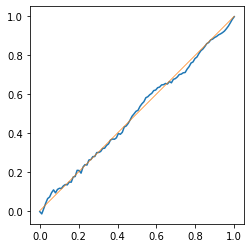

In [215]:
plt.plot(x, y)
b = [a for a in np.linspace(0, 1, 10).tolist()]
plt.plot(b, b, linewidth=0.7)
# f = lambda x: -0.853*x**4-0.64*x**3+2.453*x**2+0.04*x
# c = [f(x) for x in b]
# plt.plot(b, c)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

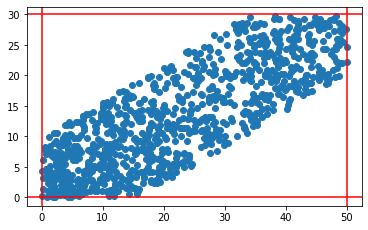

0.805600067180999

In [199]:
w, p = 50, 30
points_x, points_y, corr_coef = _gen_correlated_uniform_data(1000, w, p, 0.8)
draw_points(np.array([points_x, points_y]).T, x=w, y=p)
corr_coef

In [7]:
points_x.shape, points_y.shape, corr_coef

((100,), (100,), 0.5937369855555973)

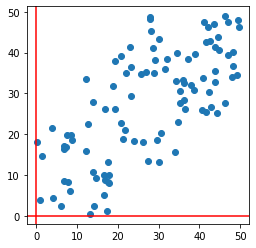

In [42]:
draw_points(np.array([points_x, points_y]).T)

In [126]:
    f = lambda x: (36439.5*x**9-175111*x**8+350871*x**7
                   -378553*x**6+236681*x**5-85720.8*x**4
                   +16903.6*x**3-1556.23*x**2+47.4516*x)

In [128]:
x = np.linspace(0, 1, 10)
for i in x:
    print(i, f(i))

0.0 0.0
0.1111111111111111 -0.45285575169051917
0.2222222222222222 1.221083922918627
0.3333333333333333 0.9958053955187864
0.4444444444444444 -0.2773716851765684
0.5555555555555556 0.2670035522283811
0.6666666666666666 1.057798872119605
0.7777777777777777 0.7185213657949348
0.8888888888888888 0.956241325555041
1.0 1.5215999999956153
